<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller: Reconocimiento facial con K-medias y K-medoides

En este caso-taller vamos a aplicar K-medias y K-medoides para agrupar rostros de indiviudos. Utilizaremos la base de datos conocida como Caras Olivetti. Esta base contiene diez imágenes diferentes de  40 personas distintas. Para algunas personas, las imágenes se tomaron en diferentes momentos, variando la iluminación, las expresiones faciales (ojos abiertos/cerrados, sonriendo/sin sonreír) y los detalles faciales (gafas/sin gafas). Todas las imágenes fueron tomadas contra un fondo homogéneo oscuro con los sujetos en una posición frontal erguida (con tolerancia a algún movimiento lateral). Esta base viene incluida dentro de la libraría `scikit-learn` y fueron provistas por T&T Laboratories Cambridge para que la comunidad académica la utilice para la evaluación de modelos predictivos.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos

Los datos pueden ser bajados directamente utilizando la librería `scikit-learn`,  la función que le permite hacer esto es `fetch_olivetti_faces`.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#Load data
data_faces = fetch_olivetti_faces(shuffle=True, random_state=42)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
# Guardamos los datos en la carpeta 'data' (esto lo maneja automáticamente fetch_olivetti_faces)
from pathlib import Path
Path("data").mkdir(parents=True, exist_ok=True)

In [ ]:
#Descriptions
print(f"Dimensiones: {data_faces.data.shape}")
print(f"Total de imagenes: {len(data_faces.images)}")
print(f"Total de personas: {len(set(data_faces.target))}")

Dimensiones: (400, 4096)
Total de imagenes: 400
Total de personas: 40


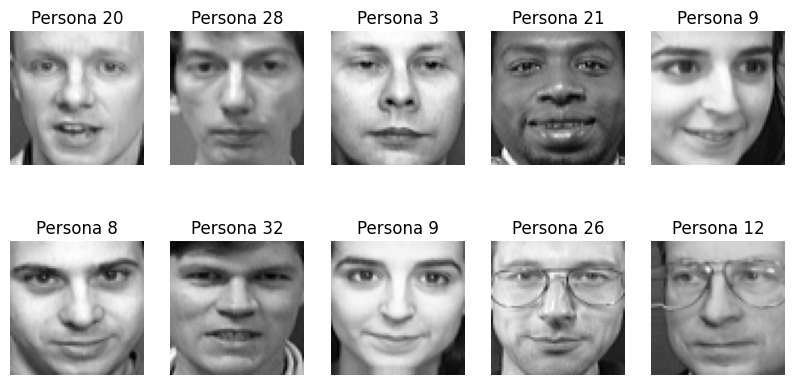

In [ ]:
#Visualization
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(data_faces.images[i], cmap="gray")
    ax.set_title(f"Persona {data_faces.target[i]}")
    ax.axis("off")
plt.show()

Se ha cargado la base de datos utilizando fetch_olivetti_faces de sklearn datasets, descargando imágenes de 40 personas, al contar con 400 imagenes. Además, se ha creado el directorio "data" para almacenar los datos.
Por otra parte, se muestra en una visualizacion las imagenes de las personas para verificar la buena carga de la información.

### 2.  Análisis preliminar

#### 2.1. Describa los contenidos de la base de datos, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes.

In [ ]:
print("Keys disponibles:", data_faces.keys())
print("Dimension de 'data_faces.data':", data_faces.data.shape)
print("Dimension de 'data_faces.images':", data_faces.images.shape)
print("# de etiquetas:", len(data_faces.target))
print("# de clases unicas:", len(set(data_faces.target)))
print("Total de fotos por cada individuo", np.bincount(data_faces.target))

Keys disponibles: dict_keys(['data', 'images', 'target', 'DESCR'])
Dimension de 'data_faces.data': (400, 4096)
Dimension de 'data_faces.images': (400, 64, 64)
# de etiquetas: 400
# de clases unicas: 40
Total de fotos por cada individuo [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]


La base contiene imágenes de rostros en blanco y negro.

En total hay 400 imágenes, que corresponden a 40 personas distintas, con 10 fotos por cada individuo. Las imágenes son en escala de grises y tienen un tamaño de 64 × 64 píxeles, es decir, cada foto se puede representar como un vector de 4096 valores (la intensidad de cada píxel)

La base incluye:

1. Las imagenes originales en formato matriz (64 × 64)
2. Una version de las imágenes convertidas en vectores (4096 valores)
3. Las etiquetas que identifican a la persona en cada foto (del 0 al 39)
4. Una breve descripcion del dataset

#### 2.2. Genere una figura con una imágen de cada uno de los individuos

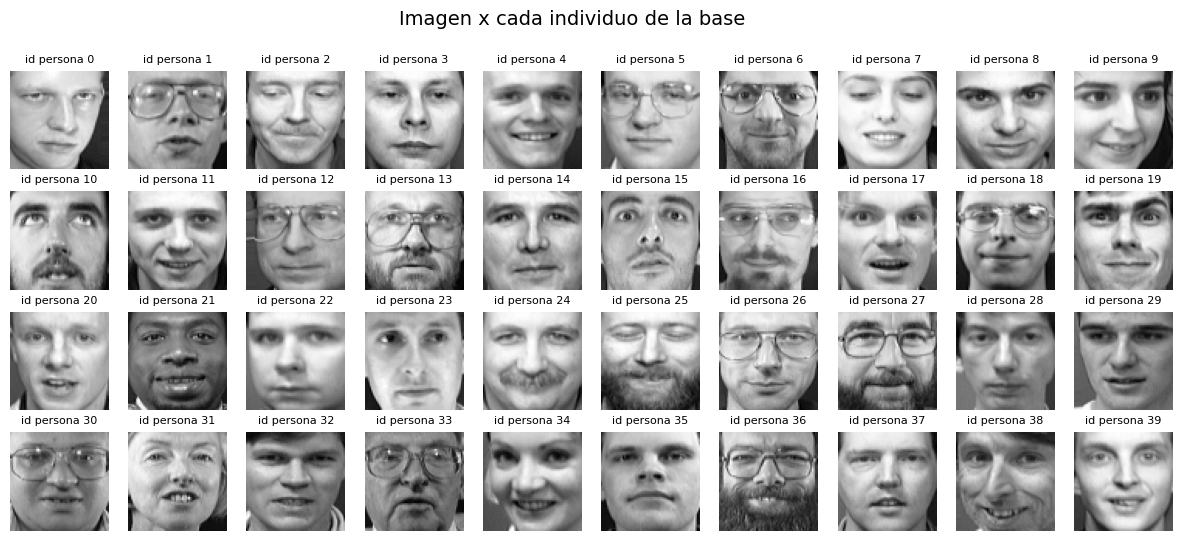

In [ ]:
label_unicos = np.unique(data_faces.target)
indice_primera_foto = [np.where(data_faces.target == label)[0][0] for label in label_unicos]

#Figura
fig, axes = plt.subplots(4, 10, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(data_faces.images[indice_primera_foto[i]], cmap="gray")
    ax.set_title(f"id persona {label_unicos[i]}", fontsize=8)
    ax.axis("off")

plt.suptitle("Imagen x cada individuo de la base", fontsize=14)
plt.show()

#### Proceso
Se generó una figura en la que aparece una imagen representativa de cada una de las 40 personas incluidas en la base
1. Se identificaron las etiquetas unicas de las personas (target)
2. Para cada persona se selecciono la primera foto disponible en la base
3. Con estas 40 fotos se construyó una figura organizada donde se muestra cada persona

#### Análisis

1. La base contiene 40 personas distintas, cada una identificada con un ID unico.
2. Las imagenes son en escala de grises y tienen un tamaño de 64 × 64 píxeles todas.
3. Hay variabilidad en expresiones faciales, temas de luces o ilumnacion y los angulos en los que fueron tomadas las fotos, practico para tareas de reconocimiento o segmentacion.
4. La mayoria de rostros son de personas de genero masculino, se denota una cantidad minoritaria de rostros femenninos en el dataset.
5. La imagen refleja una generalidad de que los rostros estan mirando de frente para la imagen.
6. 3 de cada 10 personas de las imagenes poseen gafas.

#### Conclusiones

En esta fase de exploracion, podemos concluir que el dataset esta bien balanceado, con el mismo número de fotos por persona (10). Además, muestra que las imágenes presentan suficientes cambios o variaciones, además existe singularidades dentro de cada persona de las imagenes, al producir que sea un buen banco de pruebas de algun modelo de segmentacion, ya que reune diferentes caracteristicas. Sin embargo, al existir pocas personas de genero femenino puede existir cierta limitación dentro del modelo porque no existen tantos rostros femeninos dentro de la base de estudio.

#### 2.3. Transforme las imágenes en un data frame donde cada columna contiene los valores estandarizados del nivel de gris en la imagen y una columna con la etiqueta de cada imagen.

In [ ]:
#Matriz con las caras aplanadas
X = data_faces.data #valores
y = data_faces.target #eiquetas de las fotos

In [ ]:
#Estandarizacion
scaler = StandardScaler(with_mean=True, with_std=True)
X_std = scaler.fit_transform(X)

In [ ]:
#Creacion del df
pixel_cols = [f"pixel_{i}" for i in range(X_std.shape[1])]
df_faces = pd.DataFrame(X_std, columns=pixel_cols)
df_faces["label"] = y

In [ ]:
df_faces.shape, df_faces.head(3)

((400, 4097),
     pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5   pixel_6  \
 0 -1.118128 -1.049833 -0.642890 -0.566583 -0.708002 -0.891842 -0.727535   
 1 -1.186820 -1.617487 -1.853886 -2.000562 -1.958482 -1.795912 -1.123675   
 2  0.599163  0.893291  0.738070  0.567760  0.542478  0.429491  0.411366   
 
     pixel_7   pixel_8   pixel_9  ...  pixel_4087  pixel_4088  pixel_4089  \
 0 -0.765900 -0.949737 -0.856826  ...    0.776525    0.891845    0.788581   
 1 -0.685834 -0.641426 -0.626303  ...    0.162267    0.253959   -0.285735   
 2  0.515159  0.535760  0.641575  ...   -0.360991   -0.315583   -0.219961   
 
    pixel_4090  pixel_4091  pixel_4092  pixel_4093  pixel_4094  pixel_4095  \
 0    0.770895    0.700551   -0.260389   -1.382848   -1.011783   -1.216934   
 1    0.437391    0.656828   -0.451072   -0.700041   -0.561125   -0.552694   
 2   -0.073982    0.000984   -0.027331    0.070869    0.159927    0.180261   
 
    label  
 0     20  
 1     28  
 2      3  
 
 [3 ro

#### Procedimiento
1. Aplanamiento de fotos: cada foto de 64 × 64 píxeles se transformó en un vector de 4096 valores, para generar una matriz de 400 × 4096 (data_faces.data).
2. Estandarización: se aplicó la transformación de z-score a cada columna (píxel), de manera que cada variable tenga media 0 y desviación estándar 1. Esto evita que los píxeles con mayor variabilidad dominen el análisis.
3. Creación del df: se generó un df en Pandas con 4096 columnas, cada una representando un píxel (pixel_0 hsta pixel_4095), y se añadió una columna adicional label que contiene la etiqueta de la persona correspondiente (0–39, el target).

#### Analisis

1. La estructura final del df es de 400 filas × 4097 columnas
2. Cada fila corresponde a una imagen estandarizada, con 4096 variables numéricas (los píxeles) más la etiqueta de clase
3. Es clave estandarizar para hacer uso de los algoritmos de reducción de dimensionalidad (PCA) y clustering (como K-Means o K-Medoides) ya que estos son muy sensibles a las escalas de los datos

#### Conclusiones

Se asegura comparabilidad entre todas las variables (píxeles), lo que permitirá que los algoritmos de PCA o segmentación trabajen de manera más estable y representativa

### 3. Clasificando de forma no supervisada

En esta sección trataremos de clasificar las imágenes de los individuos de forma no supervisada. Para ello utilizaremos los algoritmos de k-medias y k-medoides. Dado que sabemos que el dataset consta de 40 personas diferentes, utilizaremos esta información para pedirle a los algoritmos que encuentren k=40 clusters y examinaremos su precisión.


#### 3.1. Implemente k-medias sobre los datos estandarizados en el punto anterior.
Al implementar utilice  `random_state=123` y `n_init=10`. (Esto puede tomar mucho tiempo y requerir mucho RAM, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [ ]:
# Utilice este espacio para escribir el código.
from sklearn.cluster import KMeans

kmeans_40 = KMeans(n_clusters = 40, random_state = 123, n_init=10).fit_predict(X_std)

In [ ]:
kmeans_40[0:39]

array([ 4,  2, 13,  8, 39, 18, 26, 38, 15,  4, 12,  7,  6, 17, 28, 32, 29,
       12, 23, 20, 17, 22, 11, 29,  3, 11, 21, 18, 15, 10, 32, 32, 15,  6,
       34, 21, 21,  5,  3], dtype=int32)

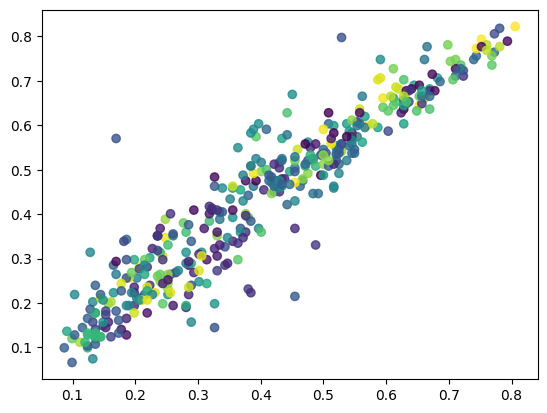

In [ ]:
fig, ax = plt.subplots()
g_puntos = plt.scatter(X[:,0], X[:,1], c = kmeans_40, alpha = 0.8, label = "Centroides")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_std, kmeans_40)
print("Silhouette Score:", score)

Silhouette Score: 0.14948846


In [ ]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y, kmeans_40)
print("ARI:", ari)

ARI: 0.44664593530548324


(Utilice este espacio para describir el procedimiento, análisis y conclusiones)
Por favor revisar este punto.

#### 3.2. Evalúe la precisión del algoritmo para agrupar las imágenes de los individuos.

In [ ]:
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
from scipy.stats import mode

# y -> etiquetas reales
# kmeans_40 -> etiquetas de clustering

# --- Calcular NMI ---
nmi = normalized_mutual_info_score(y, kmeans_40)
print("NMI:", nmi)

# --- Calcular Accuracy ---
# Se mapean clusters a clases reales usando la moda de cada cluster
labels = np.zeros_like(kmeans_40)
for i in range(40):  # 40 clusters esperados
    mask = (kmeans_40 == i)
    if np.any(mask):  # evitar clusters vacíos
        labels[mask] = mode(y[mask])[0]

acc = accuracy_score(y, labels)
print("Accuracy:", acc)

NMI: 0.7820540529106823
Accuracy: 0.66


(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 3.3. Usando PCA reduzca la dimensión de la matriz de predictores [EDGAR].
Retenga el numero de componentes que explican el 95% de la varianza y vuelva a utilizar k-medias para clasificar las imágenes comentado si la precisión mejoró.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 3.4. Utilice ahora el algoritmo por  K-medoides [ARIEL]
(Use el mismo random state a los puntos anteriores), comente si mejoró la precisión total y para cada grupo de imágenes.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

### 4. Número de clusters óptimo [LEO]

En el punto anteriores utilizamos nuestro conocimiento previo sobre los datos para elegir el número de clusters. En este punto, verifique si 40 es realmente el número de cluster que usted elegiría según los criterios estudiados en los cuadernos teóricos. Discuta los resultados obtenidos.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)